In [91]:
import sys
print(sys.version)

3.8.3 (default, Jul  2 2020, 17:28:51) [MSC v.1916 32 bit (Intel)]


In [92]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt

networkx .- tratamiento de grafos

In [93]:
import networkx as nx

Se genera un digrafo para modelizar la red de distribución siguiente

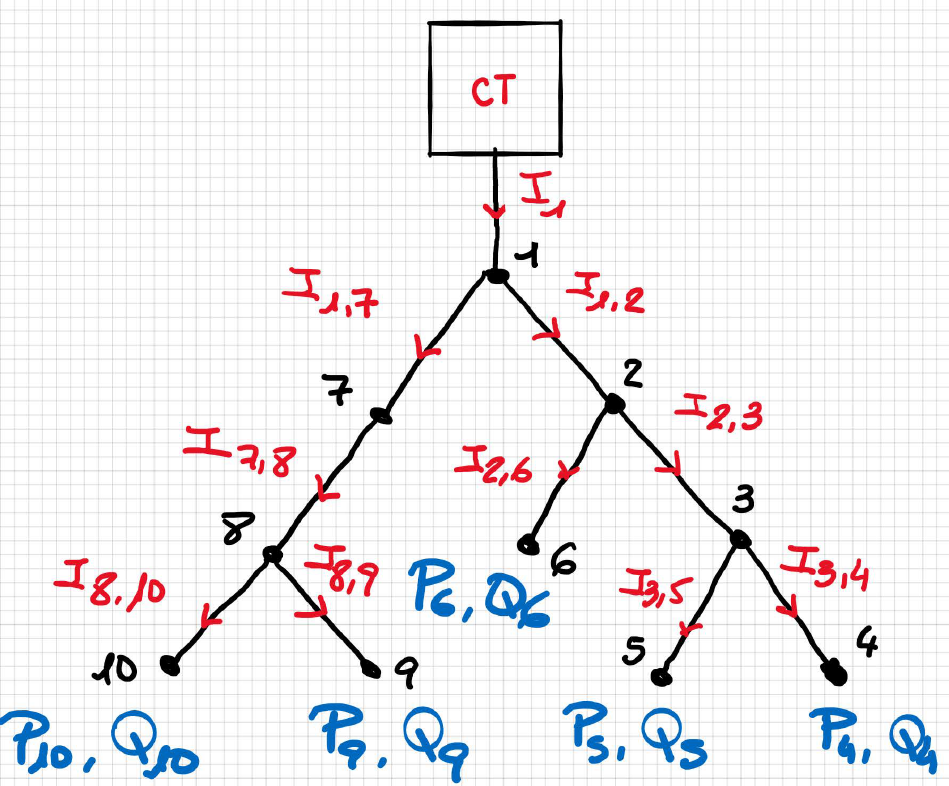

In [94]:
Image("./red_01.png", width=300)

La topología de la red se describe en el fichero topologia.xlsx (nodos) y trazas.xlsx (vanos)

In [95]:
df_nodos = pd.read_excel(r'.\topologia.xlsx')
df_traza = pd.read_excel(r'.\trazas.xlsx')
df_cups = pd.read_excel(r'.\cups.xlsx')

In [96]:
print(df_nodos)

  ID_NODO
0     N01
1     N02
2     N03
3     N04
4     N05
5     N06
6     N07
7     N08
8     N09
9     N10


In [97]:
print(df_traza)

  ID_VANO NODO_ORIGEN NODO_DESTINO
0   V0102         N01          N02
1   V0203         N02          N03
2   V0304         N03          N04
3   V0206         N02          N06
4   V0305         N03          N05
5   V0107         N01          N07
6   V0708         N07          N08
7   V0809         N08          N09
8   V0810         N08          N10


In [98]:
G=nx.DiGraph()

In [99]:
N_nodo=len(df_nodos)
print('No. de nodos: ' + str(N_nodo))

No. de nodos: 10


In [100]:
for index, row in df_nodos.iterrows():
    print( index, row['ID_NODO'])
    G.add_node( row['ID_NODO'])

0 N01
1 N02
2 N03
3 N04
4 N05
5 N06
6 N07
7 N08
8 N09
9 N10


In [101]:
N_traza=len(df_traza)
print('No. de vanos: ' + str(N_traza))

No. de vanos: 9


In [102]:
for index, row in df_traza.iterrows():
    print( index, row['ID_VANO'], row['NODO_ORIGEN'], row['NODO_DESTINO'])
    G.add_edges_from( [(row['NODO_ORIGEN'], row['NODO_DESTINO'])])

0 V0102 N01 N02
1 V0203 N02 N03
2 V0304 N03 N04
3 V0206 N02 N06
4 V0305 N03 N05
5 V0107 N01 N07
6 V0708 N07 N08
7 V0809 N08 N09
8 V0810 N08 N10


Muestra el grafo

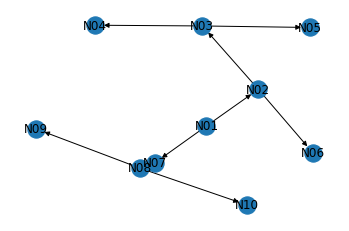

In [103]:
plt.subplot(111)
nx.draw(G, with_labels=True)

In [104]:
s1 = nx.ancestors(G,'N05')

In [105]:
print(s1)

{'N02', 'N03', 'N01'}


In [106]:
print(nx.ancestors(G,'N02'))

{'N01'}


In [107]:
print(nx.ancestors(G,'N03'))

{'N02', 'N01'}


In [108]:
print(nx.ancestors(G,'N01'))

set()


In [109]:
nx.lowest_common_ancestor(G,'N05','N01')

'N01'

In [110]:
nx.descendants(G,'N01')

{'N02', 'N03', 'N04', 'N05', 'N06', 'N07', 'N08', 'N09', 'N10'}

In [111]:
list(G.successors('N01'))

['N02', 'N07']

Definir grafo no orientado

In [112]:
G1=nx.Graph()

In [113]:
for index, row in df_nodos.iterrows():
    print( index, row['ID_NODO'])
    G1.add_node( row['ID_NODO'])

0 N01
1 N02
2 N03
3 N04
4 N05
5 N06
6 N07
7 N08
8 N09
9 N10


In [114]:
G1.add_edge( 'N01', 'N02')

In [115]:
for index, row in df_traza.iterrows():
    print( index, row['ID_VANO'], row['NODO_ORIGEN'], row['NODO_DESTINO'])
    G1.add_edge( row['NODO_ORIGEN'], row['NODO_DESTINO'])

0 V0102 N01 N02
1 V0203 N02 N03
2 V0304 N03 N04
3 V0206 N02 N06
4 V0305 N03 N05
5 V0107 N01 N07
6 V0708 N07 N08
7 V0809 N08 N09
8 V0810 N08 N10


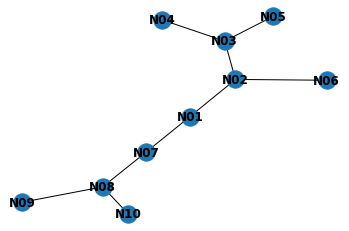

In [116]:
plt.subplot(111)
nx.draw(G1, with_labels=True, font_weight='bold')

In [117]:
nx.shortest_path(G1,'N01','N10')

['N01', 'N07', 'N08', 'N10']

In [118]:
ruta=list(nx.shortest_path(G1,'N01','N10'))

In [119]:
ruta

['N01', 'N07', 'N08', 'N10']

In [120]:
ruta.remove('N10')

In [121]:
ruta

['N01', 'N07', 'N08']

In [122]:
df_cups

,ID_NODO,P,Q
0,N01,0,0
1,N02,0,0
2,N03,0,5
3,N04,10,0
4,N05,20,7
5,N06,30,0
6,N07,0,0
7,N08,0,0
8,N09,40,0
9,N10,50,0


In [123]:
df_cups1 = df_cups[ (df_cups['P'] > 0) | (df_cups['Q'] > 0) ]

In [124]:
df_cups1

,ID_NODO,P,Q
2,N03,0,5
3,N04,10,0
4,N05,20,7
5,N06,30,0
8,N09,40,0
9,N10,50,0
